<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# Проект «Анализ вакансий из HeadHunter»
   

In [317]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

In [318]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python


In [319]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

## 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в базе (вакансии находятся в таблице `vacancies`).

In [320]:
# текст запроса
query_3_1 = f'''select
            count(name)
            from public.vacancies
         '''

In [321]:
# результат запроса
df_3_1 = pd.read_sql_query(query_3_1, connection)
df_3_1
# 49197

<ipython-input-321-f10f874fda56>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_1 = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица `employers`).

In [322]:
# текст запроса
query_3_2 = f'''select
             count(id)
            from public.employers
         '''

In [323]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
df_3_2
# 23501

<ipython-input-323-7414fc8b794d>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_2 = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитайте с помощью запроса количество регионов (таблица `areas`).

In [324]:
# текст запроса
query_3_3 = f'''select
            count (id)
            from public.areas
         '''

In [325]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
df_3_3
# 1362

<ipython-input-325-869c5b065987>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_3 = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица `industries`).

In [326]:
# текст запроса
query_3_4 = f'''select
            count (id)
            from public.industries
         '''

In [327]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
df_3_4
# 294

<ipython-input-327-33d8886b67b7>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_4 = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

In [328]:
# выводы по предварительному анализу данных

Проведя анализ четырех запросов, можно сделать следующие выводы:

Количество вакансий в базе - 49197

Количество работодателей - 23501

Количество регионов - 1362

Количество сфер деятельности - 294

## 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (`cnt`) вакансий в каждом регионе (`area`).
Отсортируйте по количеству вакансий в порядке убывания.

In [329]:
# текст запроса
query_4_1 = f'''
            SELECT
            COUNT (v.id) AS cnt,
            ar.name AS area
            FROM public.vacancies AS v
            JOIN public.areas AS ar ON v.area_id = ar.id
            GROUP BY ar.name
            ORDER BY count (v.id) DESC
            '''

In [330]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1
# Москва, Санкт-Петербург, Минск, Новосибирск, Алматы

<ipython-input-330-7a2cf935423b>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_1 = pd.read_sql_query(query_4_1, connection)


,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Тарко-Сале
765,1,Новоаннинский
766,1,Бирск
767,1,Сасово


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [331]:
# текст запроса
query_4_2 = f'''
            SELECT
            COUNT(id)
            FROM public.vacancies
            WHERE (salary_from IS NOT NULL) or (salary_to IS NOT NULL)
            '''

In [332]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2
# 24073

<ipython-input-332-e3911810af00>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_2 = pd.read_sql_query(query_4_2, connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до **целого числа**.

In [333]:
# текст запроса
query_4_3 = f'''
            SELECT
            round (AVG (salary_from)) AS avg_salary_from,
            round(AVG (salary_to)) AS avg_salary_to
            FROM public.vacancies
            '''

In [334]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3
# avg_salary_from = 71065.0; avg_salary_to = 110537.0

<ipython-input-334-30686bcde161>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_3 = pd.read_sql_query(query_4_3, connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (`schedule`) и типа трудоустройства (`employment`), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [335]:
# текст запроса
query_4_4 = f'''
            SELECT
            COUNT (id) as cnt,
            schedule,
            employment
            FROM public.vacancies
            GROUP BY schedule, employment
            ORDER BY COUNT(id) DESC
            '''

In [336]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4
#Какая пара находится на втором месте по популярности?
#Удалённая работа — Полная занятость

<ipython-input-336-39e77f321bde>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_4 = pd.read_sql_query(query_4_4, connection)


,cnt,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля «Требуемый опыт работы» (`experience`) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [337]:
# текст запроса
query_4_5 = f'''
            SELECT
            COUNT (id) as cnt,
            experience
            FROM public.vacancies
            WHERE experience IS NOT NULL
            GROUP BY experience
            ORDER BY COUNT(id) ASC
            '''

In [338]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5
# Более 6 лет — Нет опыта — От 3 до 6 лет — От 1 года до 3 лет

<ipython-input-338-f726d70d8f1b>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_5 = pd.read_sql_query(query_4_5, connection)


,cnt,experience
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


In [339]:
# выводы по детальному анализу вакансий


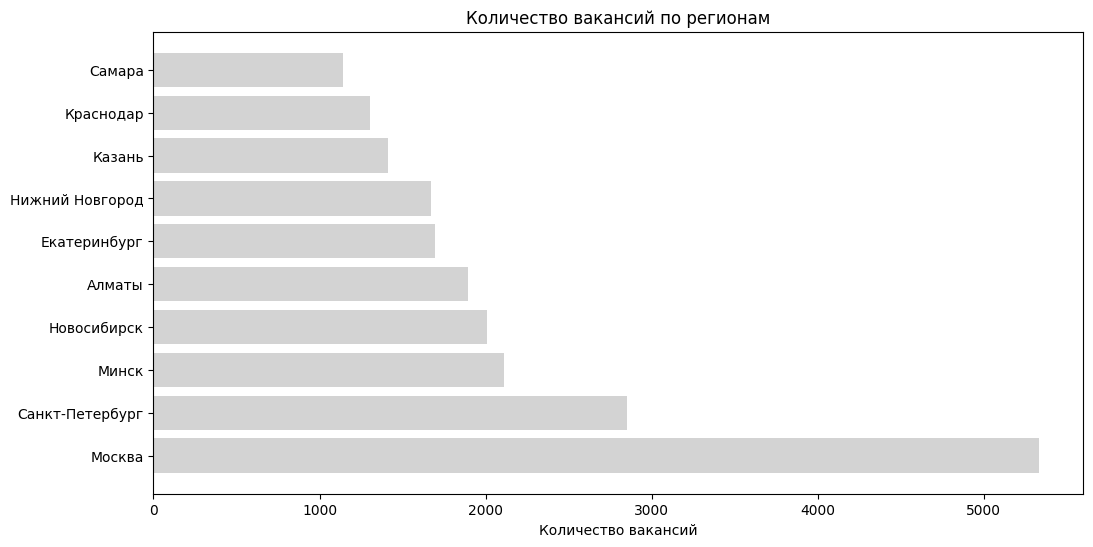

In [340]:
# Построим график распределения вакансий по топ-5 регионам

plt.figure(figsize=(12, 6))
plt.barh(df_4_1['area'][:10], df_4_1['cnt'][:10], color='lightgray')
plt.xlabel('Количество вакансий')
plt.title('Количество вакансий по регионам')
plt.show()

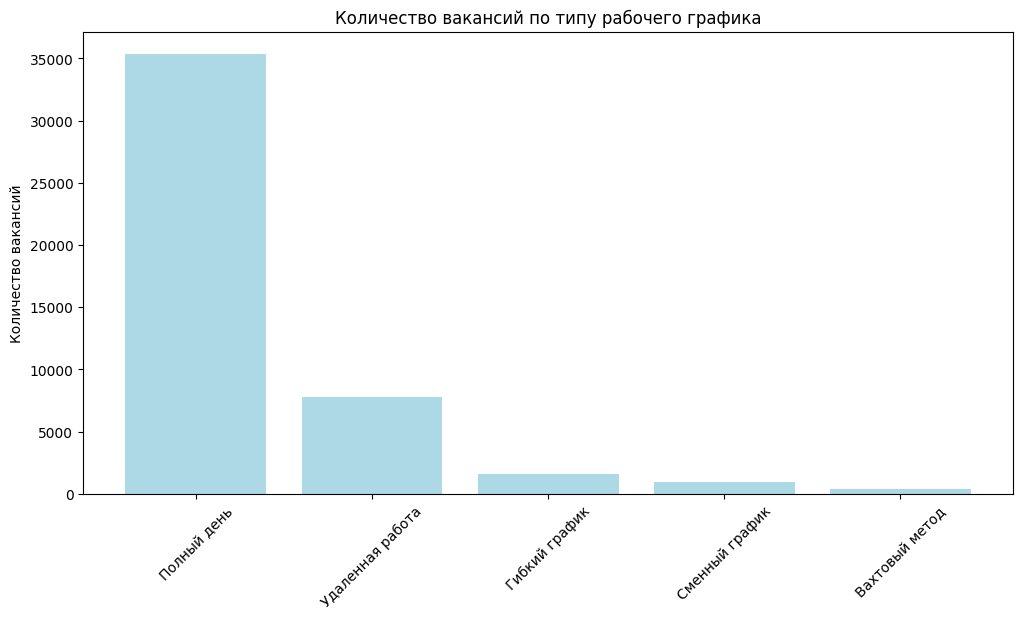

In [341]:
# График распределения вакансий по типу занятости

plt.figure(figsize=(12, 6))
plt.bar(df_4_4['schedule'], df_4_4['cnt'], color='lightblue')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий по типу рабочего графика')
plt.xticks(rotation=45)
plt.show()

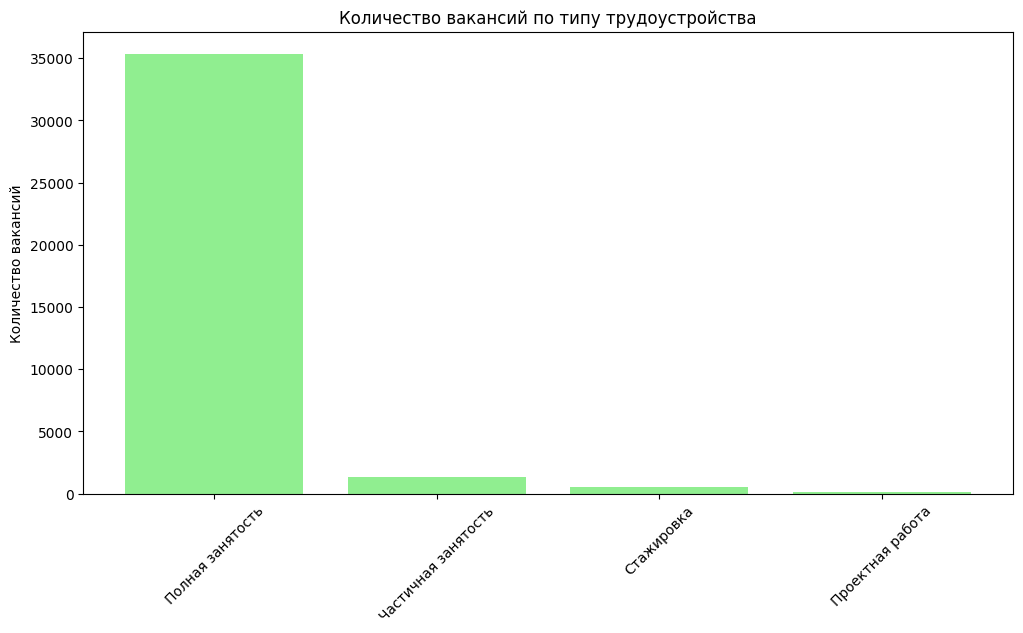

In [342]:
# График распределения вакансий по типу трудоустройства

plt.figure(figsize=(12, 6))
plt.bar(df_4_4['employment'], df_4_4['cnt'], color='lightgreen')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий по типу трудоустройства')
plt.xticks(rotation=45)
plt.show()

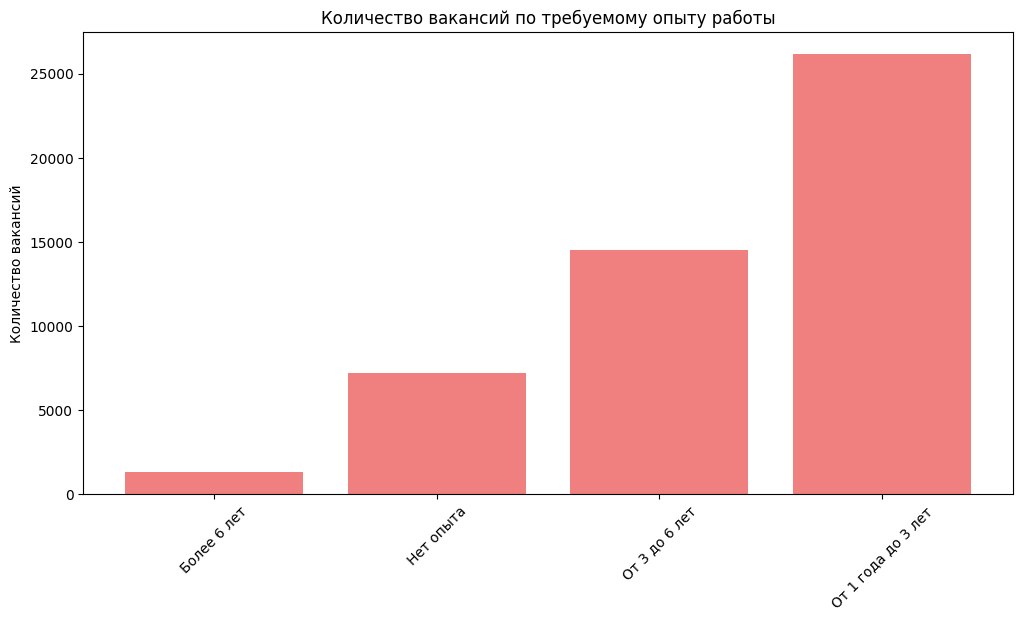

In [343]:
# График распределения вакансий по требуемому опыту работы

plt.figure(figsize=(12, 6))
plt.bar(df_4_5['experience'], df_4_5['cnt'], color='lightcoral')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий по требуемому опыту работы')
plt.xticks(rotation=45)
plt.show()

**Выводы по разделу 4. Детальный анализ вакансий**

1. Выводы по Количеству вакансий по регионам:

Наибольшее количество вакансий представленно в Москве (5333), что может указывать на высокую потребность в кадрах в столице. Санкт-Петербург, Минск, Новосибирск и Алма-ты также имеют значительное количество вакансий. Меньшее количество вакансий в удаленных регионах (например, в таких населенных пунктах, как  Тарко-Сале, Новоаннинский, Сасово, Анна). В таких регионах возможно: меньшая экономическая активность; меньшая потребность в рабочей силе; большая удаленность от других населенных пунктов.

2. Выводы по Зарплатным данным:

Из 49197 вакансий только 24073 (около 49%) имеют указанные зарплатные данные. Скорее всего,  работодатели не всегда готовы раскрывать эту информацию. Диапазон зарплат достаточно широк, а средние значения зарплат предсталены от  71065 руб. до  110537 руб., что может быть связано с различными уровнями квалификации и опытом работы.

3. Выводы по Типам занятости:

Большинство вакансий (35367) предлагают полную занятость с полным рабочим днем. Удаленная работа хоть и значительно меньше количеству (7802 вакансии), но тоже пользуется спросом, что может быть связано с изменениями в трудовых отношениях, как после пандемии, так и с расширением рынка фриланс-услуг.

4. Опыт работы:

Наибольшее количество вакансий (26152) требует от 1 года до 3 лет опыта. Вакансии для кандидатов без опыта (7197) также имеют значительное количество. Все это может указывать на то, что работодатели ищут молодых кандидатов с небольшим опытом работы.

## 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [344]:
# текст запроса
query_5_1 = f'''
            (SELECT
            COUNT (v.id) AS cnt,
            em.name AS employers
            FROM public.vacancies AS v
            JOIN public.employers AS em ON v.employer_id = em.id
            GROUP BY em.name
            ORDER BY count (v.id) DESC
            LIMIT 1)
            UNION ALL
            (SELECT
            COUNT (v.id) AS cnt,
            em.name AS employers
            FROM public.vacancies AS v
            JOIN public.employers AS em ON v.employer_id = em.id
            GROUP BY em.name
            ORDER BY count (v.id) DESC
            OFFSET 4 LIMIT 1)
            '''

In [345]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
df_5_1
# 1 - Яндекс
# 5 - Газпром нефть

<ipython-input-345-f54bdfb89009>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_1 = pd.read_sql_query(query_5_1, connection)


,cnt,employers
0,1933,Яндекс
1,331,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [346]:
# текст запроса
query_5_2 = f'''
            SELECT
            ar.name AS region,
            COUNT (em.id) AS employers_cnt,
            COUNT (v.id) AS vacancies_cnt
            FROM public.areas AS ar
            LEFT JOIN public.vacancies AS v ON v.area_id=ar.id
            LEFT JOIN public.employers AS em ON ar.id = em.area
            GROUP BY ar.name
            HAVING COUNT(v.id) = 0
            ORDER BY employers_cnt DESC
            '''

In [347]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2
# Россия

<ipython-input-347-f1b3440645b7>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_2 = pd.read_sql_query(query_5_2, connection)


,region,employers_cnt,vacancies_cnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Струнино,0,0
589,Славгород (Алтайский край),0,0
590,Сорочинск,0,0
591,Ленинский (Тульская область),0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [348]:
# текст запроса
query_5_3 = f'''
            (SELECT
            em.name AS emp_name,
            COUNT (DISTINCT ar.id) AS reg_cnt
            FROM public.employers AS em
            JOIN public.vacancies AS v ON v.employer_id = em.id
            JOIN public.areas AS ar ON ar.id = v.area_id
            GROUP BY em.name)
            UNION
            (SELECT
            em.name, 0
            FROM public.employers AS em
            LEFT JOIN public.vacancies AS v on v.employer_id = em.id
            WHERE v.id IS NULL)
            ORDER BY reg_cnt DESC
            '''

In [349]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

<ipython-input-349-e83115aae06f>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_3 = pd.read_sql_query(query_5_3, connection)


,emp_name,reg_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23298,Доктор Зета,0
23299,Fiba Retail,0
23300,Эфмек Рус,0
23301,ФГАУ РЦУД и РТ,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [350]:
# текст запроса
query_5_4 = f'''
            SELECT
            COUNT (em.id) AS employers_cnt
            FROM public.employers AS em
            LEFT JOIN public.employers_industries AS emp_ind ON emp_ind.employer_id = em.id
            WHERE emp_ind.industry_id IS NULL
            '''

In [351]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4
# 8419

<ipython-input-351-c41477e6f44a>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_4 = pd.read_sql_query(query_5_4, connection)


,employers_cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [352]:
# текст запроса
query_5_5 = f'''
            SELECT
            em.name AS employer,
            COUNT (emp_ind.industry_id) AS industry_cnt
            FROM public.employers AS em
            LEFT JOIN public.employers_industries AS emp_ind ON emp_ind.employer_id = em.id
            GROUP BY em.name
            HAVING COUNT (emp_ind.industry_id) = 4
            ORDER BY em.name ASC
            OFFSET 2
            LIMIT 1
            '''

In [353]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5
# 2ГИС

<ipython-input-353-01b2d7678fbf>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_5 = pd.read_sql_query(query_5_5, connection)


,employer,industry_cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».


In [354]:
# текст запроса
query_5_6 = f'''
            SELECT
            ind.name AS industry,
            COUNT (emp_ind.employer_id) AS employer
            FROM public.industries AS ind
            LEFT JOIN public.employers_industries AS emp_ind ON emp_ind.industry_id = ind.id
            WHERE ind.name = 'Разработка программного обеспечения'
            GROUP BY ind.name
            '''

In [355]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6
#3553

<ipython-input-355-4e400d4d98a2>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_6 = pd.read_sql_query(query_5_6, connection)


,industry,employer
0,Разработка программного обеспечения,3553


7. Для компании «Яндекс» выведите список [городов-миллионников](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8), в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку "Total" с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

    Если возникнут трудности с этим заданием, посмотрите материалы модуля 6.4 «Как получать данные из веб-источников и API».

In [356]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
data = pd.read_html(url)
city_df = data[0]
city_list = list(city_df['Город'])
city_list



['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Самара',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [357]:
# Преобразуем список городов в строку для SQL-запроса
city_list_str = ', '.join(f"'{city}'" for city in city_list)
city_list_str

"'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград'"

In [358]:
# текст запроса
query_5_7 = f'''
WITH vacancy_counts AS (
    SELECT
    ar.name AS city_name,
    COUNT(v.id) AS vacancy_cnt
FROM public.areas AS ar
LEFT JOIN public.vacancies AS v ON v.area_id = ar.id
LEFT JOIN public.employers AS em ON v.employer_id = em.id
WHERE em.name = 'Яндекс'
    AND ar.name IN ({city_list_str})
GROUP BY ar.name
ORDER BY COUNT(v.id)
)

SELECT
city_name,
vacancy_cnt
FROM vacancy_counts
UNION ALL
SELECT
'Total',
SUM(vacancy_cnt)
FROM vacancy_counts
'''

In [359]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
df_5_7
# 17
## Total	485

<ipython-input-359-6b22d3065c4f>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_7 = pd.read_sql_query(query_5_7, connection)


,city_name,vacancy_cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

In [360]:
# выводы по анализу работодателей


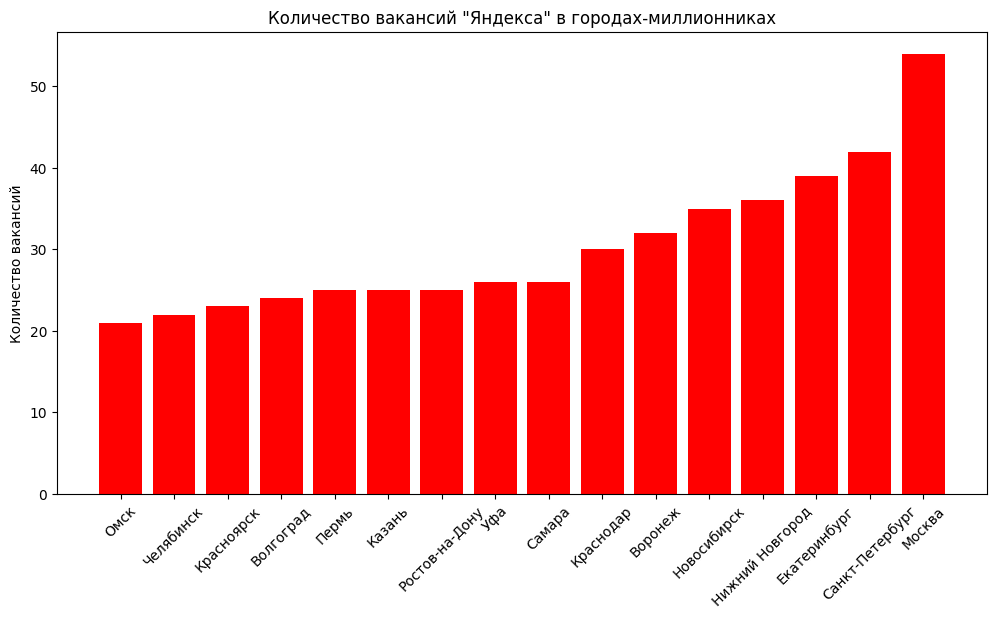

In [361]:
# График топ работодателей по количеству вакансий "Яндекса" в городах-миллионниках
plt.figure(figsize=(12, 6))
plt.bar(df_5_7['city_name'][:16], df_5_7['vacancy_cnt'][:16], color='red')
plt.ylabel('Количество вакансий')
plt.title('Количество вакансий "Яндекса" в городах-миллионниках')
plt.xticks(rotation=45)
plt.show()

**Выводы по разделу 5. Анализ работодателей**

1. Топ-5 работодателей. На первом месте по количеству вакансий находится компания "Яндекс" с 1933 вакансиями, что указывает на её активное присутствие на рынке труда. Остальные компании, такие как "Ростелеком" и "Тинькофф", имеют значительно меньшее количество вакансий.Газпром нефть занимвет 5 место.

2. Работодатели без вакансий. В регионах, где нет вакансий, количество работодателей варьируется. Например, в России 410 работодателей не имеют вакансий.

3. Разнообразие работодателей. "Яндекс" публикует вакансии в 181 регионе. Очевидно, что компания лидирует не только по по количеству вакансий, но географическому распространению.

4. Отсутствие сферы деятельности. Не указали свою сферу деятельности 8419 работодателей, что существенно затрудняет соискателям поиск информации о потенциальных работодателях и их специализации.

5. Компании с несколькими сферами деятельности. "2ГИС" является третьей компанией в алфавитном списке, у которой указано четыре сферы деятельности.Можно переформулировать запрос и выяснить, кто занимает 1 и 2 место: "101 Интернет" и "21vek.by" соответственно, у которых также указано четыре сферы деятельности.

6. Сфера "Разработка программного обеспечения". В качестве своей сферы деятельности 3553 работодателя указали "Разработка программного обеспечения". Это показывает высокую востребованность специалистов в этой области.

7. Вакансии "Яндекса" в городах-миллионниках. "Яндекс" имеет наибольшее количество вакансий в Москве (54), что может указывать на концентрацию бизнеса в столице. В других городах-миллионниках также есть вакансии, но их количество значительно меньше.

## 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

    Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова `'data'` или `'данн'`.

    *Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [362]:
# текст запроса
query_6_1 = f'''
            SELECT
            COUNT (id)
            FROM public.vacancies
            WHERE LOWER(name) LIKE '%data%'
            OR LOWER(name) LIKE '%данн%'
            '''

In [363]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1
#1771

<ipython-input-363-09b7bf06f757>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_1 = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
    * 'data scientist'
    * 'data science'
    * 'исследователь данных'
    * 'ML' (здесь не нужно брать вакансии по HTML)
    * 'machine learning'
    * 'машинн%обучен%'

    **В следующих заданиях мы продолжим работать с вакансиями по этому условию.**

    Считаем вакансиями для специалистов уровня Junior следующие:
    + в названии есть слово “junior” **или**
    + требуемый опыт — «Нет опыта» **или**
    + тип трудоустройства — «Стажировка».


In [364]:
# текст запроса
query_6_2 = f'''
            SELECT
            COUNT (id)
            FROM public.vacancies
            WHERE (LOWER(name) LIKE '%data scientist%'
            OR LOWER(name) LIKE '%data science%'
            OR LOWER(name) LIKE '%исследователь данных%'
            OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
            OR LOWER(name) LIKE '%machine learning%'
            OR LOWER(name) LIKE '%машинн%обучен%')
            AND (LOWER(name) LIKE '%junior%'
                OR experience = 'Нет опыта'
                OR employment =  'Стажировка')
            '''

In [365]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2
#51

<ipython-input-365-751f2fefce58>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_2 = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres?

    *Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [366]:
# текст запроса
query_6_3 = f'''
            SELECT
            COUNT (id)
            FROM public.vacancies
            WHERE (LOWER(name) LIKE '%data scientist%'
            OR LOWER(name) LIKE '%data science%'
            OR LOWER(name) LIKE '%исследователь данных%'
            OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
            OR LOWER(name) LIKE '%machine learning%'
            OR LOWER(name) LIKE '%машинн%обучен%')
            AND (key_skills LIKE '%SQL%'
                OR key_skills = '%Postgres%')
            '''

In [367]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3
#229

<ipython-input-367-89e1e988f2b2>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_3 = pd.read_sql_query(query_6_3, connection)


,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

    *Это можно сделать помощью запроса, аналогичного предыдущему.*

In [368]:
# текст запроса
query_6_4 = f'''
            SELECT
            COUNT (id)
            FROM public.vacancies
            WHERE (LOWER(name) LIKE '%data scientist%'
            OR LOWER(name) LIKE '%data science%'
            OR LOWER(name) LIKE '%исследователь данных%'
            OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
            OR LOWER(name) LIKE '%machine learning%'
            OR LOWER(name) LIKE '%машинн%обучен%')
            AND key_skills LIKE '%Python%'
            '''

In [369]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4
#357

<ipython-input-369-8a011510bf94>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_4 = pd.read_sql_query(query_6_4, connection)


,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до **двух знаков после точки-разделителя**.

In [370]:
# текст запроса
query_6_5 = f'''
            SELECT
            COUNT(id) AS vacance_cnt,
            ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS avg_key_skills
            FROM public.vacancies
            WHERE (LOWER(name) LIKE '%data scientist%'
            OR LOWER(name) LIKE '%data science%'
            OR LOWER(name) LIKE '%исследователь данных%'
            OR (LOWER(name) LIKE '% ml %' AND LOWER(name) NOT LIKE '%html%')
            OR LOWER(name) LIKE '%machine learning%'
            OR LOWER(name) LIKE '%машинн%обучен%')
            AND key_skills IS NOT NULL
            AND key_skills != '';
            '''

In [371]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5
# 6.41

<ipython-input-371-2411e46b706b>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_5 = pd.read_sql_query(query_6_5, connection)


,vacance_cnt,avg_key_skills
0,352,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля `experience`).

    При решении задачи примите во внимание следующее:
    1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
    2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
    3. Если в расчётах участвует `null`, в результате он тоже даст `null` (посмотрите, что возвращает запрос `select 1 + null`). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит `null` на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

    Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до **целого числа**.

In [372]:
# текст запроса
query_6_6 = f'''
            SELECT
            experience,
            AVG((COALESCE(salary_from, salary_to) + COALESCE(salary_to, salary_from)) / 2)::int AS avg
            FROM public.vacancies
            WHERE (LOWER(name) LIKE '%data scientist%'
            OR LOWER(name) LIKE '%data science%'
            OR LOWER(name) LIKE '%исследователь данных%'
            OR (name LIKE '%ML%' AND LOWER(name) NOT LIKE '%html%')
            OR LOWER(name) LIKE '%machine learning%'
            OR LOWER(name) LIKE '%машинн%обучен%')
            AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
            GROUP BY experience
            '''

In [373]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6
#243115

<ipython-input-373-910c46731b2f>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_6 = pd.read_sql_query(query_6_6, connection)


,experience,avg
0,Нет опыта,74643
1,От 1 года до 3 лет,139675
2,От 3 до 6 лет,243115


***

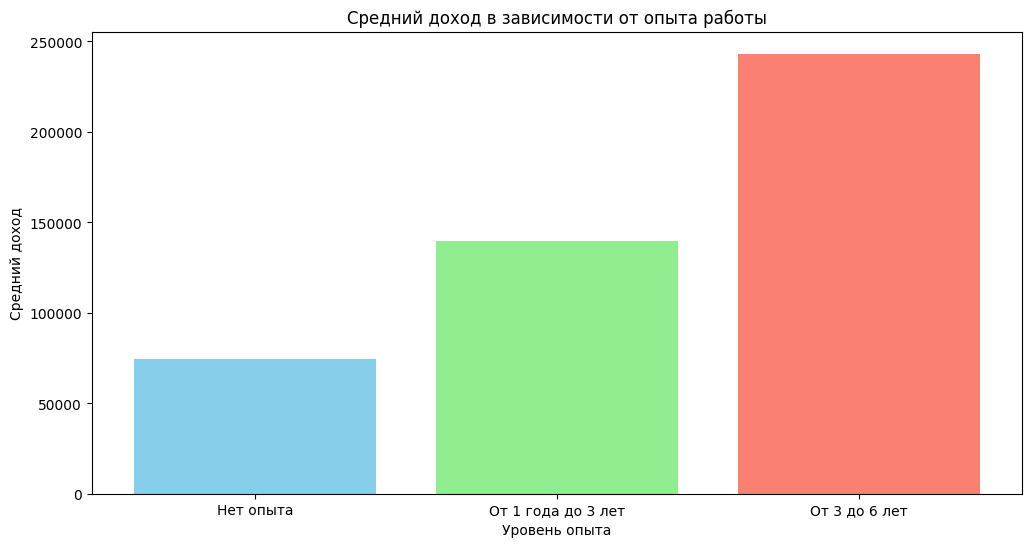

In [374]:
# Построение столбчатого графика
plt.figure(figsize=(12, 6))
plt.bar(df_6_6['experience'], df_6_6['avg'], color=['skyblue', 'lightgreen', 'salmon'])
# Добавление заголовка и меток
plt.title('Средний доход в зависимости от опыта работы')
plt.xlabel('Уровень опыта')
plt.ylabel('Средний доход')
plt.show()


In [375]:
# выводы по предметному анализу

**Выводы по разделу 6. Предметный анализ**

Из 1771 вакансии, имеющей отношение к данным, только 51 подходит для уровня Junior (возможно, из-за высокой конкуренции для начинающих специалистов).
Знания SQL или Postgres требуют 229 вакансий для Data Scientists.
Знания Python - 357 вакансий.
В среднем в вакансиях для Data Scientists указывается 6.41 ключевых навыков (нужны разнообразные навыки).
Самая высокая средняя зарплата для Data Scientists связана с наличием опыта от 3 до 6 лет и составляет 243115 руб.

## Общий вывод по проекту

В ходе анализа вакансий, работодателей и предметного анализа в области Data Science были получены следующие ключевые выводы:

Общее количество вакансий на рынке труда представлено 49197, с наибольшим количеством в Москве (5333).

Компания "Яндекс" лидирует как по количеству вакансий (1933 вакансий), так и по географической публикациит вакансии (181 регион).

В вакансиях часто требуют навыки SQL (229 вакансий) и Python (357 вакансий).
Из 1771 вакансий, связанной с данными, только 51 подходит для уровня Junior Data Scientist.
Для Data Scientists с опытом от 3 до 6 лет средняя зарплата составляет 243115 руб.

Дополнительные исследования и прогнозы понять динамику рынка труда (спроса и предлодения работодателей) и подготовить неоходимых специалистов. Для рассмотрения более детальногой анализа вакансий в области Data Science следует:
1. Изучить изменения в количестве вакансий за последние несколько лет для выявления требуемых направлений на бирже труда.
2. Исследовать вакансии по регионам для выявления мест с наибольшим спросом на кандидатов-Data Scientists.
3. Провести опрос среди работодателей о наиболее востребованных навыках для Data Scientists, чтобы лучше понять требования рынка.



In [376]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

In [378]:
# не забываем закрыть соединение после окончания работы
connection.close()